<img src="https://deap.readthedocs.io/en/master/_images/deap_long.png" width="30%">

Στην Python είναι διαθέσιμες πολλές βιβλιοθήκες γενετικών αλγόριθμων: 
- [Pyevolve](http://pyevolve.sourceforge.net/)
- [pyeasyga](https://pypi.python.org/pypi/pyeasyga)
- [PyOCL/OpenCLGA](https://github.com/PyOCL/OpenCLGA)
- [inspyred](https://pypi.python.org/pypi/inspyred)

Θα βρούμε επίσης γενετικούς σε βιβλιοθήκες βελτιστοποίησης όπως η [PyOpt](http://www.pyopt.org/)

Μια από τις πιο ενεργές, ευρύτερα χρησιμοποιούμενες και ενδιαφέρουσες βιβλιοθήκες είναι η [DEAP (Distributed Evolutionary Algorithms in Python)](https://github.com/DEAP/deap). Τα κύρια πλεονεκτήματα της DEAP είναι:
- μπορεί να αναπτύξει κανείς γενετικούς αλγόριθμους πάνω σε οποιαδήποτε δομή δεδομένων (list, array, set, dictionary, tree, numpy array κλπ) ή ad hoc κλάση. 
- είναι διαθέσιμοι πολλοί γνωστοί γενετικοί τελεστές και ολόκληροι αλγόριθμοι, αλλά έχει κανείς επίσης τη δυνατότητα να ορίζει εύκολα τους δικούς του, κάτι που είναι ιδιάιτερα χρήσιμο στις περιπτώσεις που είναι ιδιαίτερα εξαρτώμενοι από το πρόβλημα.
- οι γενετικοί είναι από τη φύση τους πολύ κατάλληλοι για παράλληλη εκτέλεση (παράδειγμα: η αποτίμηση της καταλληλότητας ενός πληθυσμού). Η DEAP σε συνδυασμό με τις βιβλιοθήκες "SCOOP" και "multiprocessing" προσφέρει ένα πολύ εύκολο τρόπο για αποτελεσματική παράλληλη υλοποίηση των αλγόριθμων.

# Εισαγωγή

Εγκατάσταση:

In [1]:
! pip install deap

    100% |████████████████████████████████| 942kB 852kB/s eta 0:00:01
  Running setup.py bdist_wheel for deap ... done
  Stored in directory: /gpfs/fs01/user/s440-f39bd962225440-fe8dadcb5f83/.cache/pip/wheels/82/aa/67/2c93e17c84646c86099fda53ee0b3329372dcf94dd8789fd13
Successfully built deap


## Βασικές έννοιες: Creator, Base, Fitness

Οι δύο βασικές έννοιες του DEAP είναι οι Creator και Base. 

O **Creator** είναι ένα μέτα - εργοστάσιο δημιουργίας κλάσεων που θα χρησιμεύσουν στον γενετικό αλγόριθμο. Η **Base** είναι ένα δομοστοιχείο που παρέχει δύο βασικές δομές (κλάσεις) για την κατασκευή του γενετικού: το **Toolbox**, που θα χρησιμοποιήσουμε για να αποθηκέυσουμε (εισάγουμε) τους τελεστές και την (εικονική) κλάση **Fitness** που θα χρησιμοποιήσουμε για να κατασκευάσουμε το μέλος καταλληλότητας του κάθε ατόμου.

Ας πούμε ότι θέλουμε να ορίσουμε μια συνάρτηση καταλληλότητας προς *ελαχιστοποίηση*:

In [2]:
from deap import base, creator
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

Η συνάρτηση `create` λαμβάνει τουλάχιστον __δύο ορίσματα__: το όνομα της κλάσης που θα δημιουργήσουμε και τη βασική κλάση από την οποία θα κληρονομίσει. Τα ακόλουθα ορίσματα αποτελούν χαρακτηριστικά της κλάσης. Στην περίπτωση του παραδείγματος, η νέα κλάση `FitnessMin` κληρονομεί την `base.Fitness` με χαρακτηριστικό την πλειάδα weights (-1.0,). Το (-1.0,) σημαίνει ότι θέλουμε να ελαχιστοποιήσουμε ένα μόνο κριτήριο. Εξ ορισμού το DEAP είναι σχεδιασμένο για πολυ-κριτηριακή βελτιστοποίηση (multi-objective optimization) και γι' αυτό αναμένει μια πλειάδα βαρών εξού και το ",". Αν θέλαμε να μεγιστοποιήσουμε ένα κριτήριο θα θέταμε weights=(1.0,). Στη μονοκριτηριακή βελτιστοποίηση σημασία έχει μόνο το πρόσημο του βάρους. Για πολυκριτηριακή βελτιστοποίηση τα βάρη καθορίζουν τη σχετική σημασία των κριτηρίων. Για παράδειγμα το weights=(-1.0,2.0) ορίζει μια πολυκριτηριακή βελτιστοποίηση όπου θέλουμε να ελαχιστοποιήσουμε το πρώτο κριτήριο, να μεγιστοποιήσουμε το δεύτερο, και το δεύτερο έχει διπλάσια σημασία (βάρος) από το πρώτο.

Στη συνέχεια ορίζουμε την κλάση του **ατόμου** το οποίο κληρονομεί από τον τύπο *list* και περιλαμβάνει το χαρακτηρηστικό `FitnessMin`

In [3]:
creator.create("Individual", list, fitness=creator.FitnessMin)

Μπορούμε τώρα να ορίσουμε ένα στιγμιότυπο ατόμου και να υπολογίσουμε/ορίσουμε την καταλληλότητα του:

In [4]:
ind = creator.Individual([1,0,1,0,1])
ind.fitness.values = (sum(ind),)

print ind
print type(ind)
print type(ind.fitness)
print ind.fitness.values

[1, 0, 1, 0, 1]
<class 'deap.creator.Individual'>
<class 'deap.creator.FitnessMin'>
(3.0,)


Στο συγκεκριμένο παράδειγμα ορίσαμε ως καταλληλότητα το άθροισμα των στοιχείων της λίστας που αποτελούν το άτομο ind. Η καταλληλότητα στο DEAP είναι πάντα πλειάδα και η μονοκριτηριακή βελτιστοποίηση είναι μια ειδική περίπτωση (προσέξτε το ","). Επίσης προσέξτε ότι εμείς ορίζουμε τις τιμές του χαρακτηρηστικού fitness.values. 

## Τελεστές

Το DEAP μας επιτρέπει να δημιουργούμε τελεστές μαζί με τις παραμέτρους τους και να τους ομαδοποιούμε σε εργαλιοθήκες (toolbox):

In [5]:
from deap import tools
toolbox = base.Toolbox()
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, std=1.0)

Αρχικοποιούμε ένα στιγμιότυπο *toolbox* και του αναθέτουμε με τη register ένα τελεστή διασταύρωσης και ένα τελεστή μετάλλαξης. Η register απαιτεί τουλάχιστον δύο ορίσματα, το όνομα που δίνουμε στον τελεστή και τη συνάρτηση που τον υλοποιεί. Τα επόμενα ορίσματα μπορούν να είναι παράμετροι του τελεστή. Εδώ χρησιμοποιούμε τις builtin cxOnePoint (διαστάυρωση ενός σημείου) και mutGausian (γκαουσιανή μετάλλαξη με μέση τιμή 0 και απόκλιση 1 στο παράδειγμα).

## Παραλληλισμός
Η DEAP μπορεί εύκολα να παραλληλοποιηθεί με τη χρήση της βιβλιοθήκης Scalable Concurent Operations ([SCOOP](https://github.com/soravux/scoop))  και να τρέξει σε κατανεμημένα συστήματα. Γιαυτό αρκεί κανείς να αντικαταστήσει στο toolbox τη στάνταρ συνάρτηση `map` της Python (που εφαρμόζει μια συνάρτηση σε κάθε στοιχείο μιας λίστας) με τη συνάρτηση map του SCOOP. 

In [7]:
!pip install scoop
from scoop import futures
toolbox.register("map", futures.map)

    100% |████████████████████████████████| 604kB 410kB/s eta 0:00:01
    100% |████████████████████████████████| 51kB 4.4MB/s eta 0:00:01
  Running setup.py bdist_wheel for scoop ... done
  Stored in directory: /gpfs/fs01/user/s440-f39bd962225440-fe8dadcb5f83/.cache/pip/wheels/19/06/2d/960368bee11f7fef07a4091dac719e8f9f398524c321f11695
Successfully built scoop


Ωστόσο ο κώδικας αυτός απαιτείται να τρέξει εκτός notebook σύμφωνα με τα παραδείγματα [εδώ](http://deap.readthedocs.io/en/master/tutorials/basic/part4.html) και [εδώ](http://scoop.readthedocs.io/en/latest/usage.html).  

Η DEAP μπορεί επίσης να χρησιμοποιήσει τη map της βιβλιοθήκης multiprocessing για να τρέξει παράλληλα σε πολλούς πυρήνες ενός μηχάνηματος:

In [8]:
import multiprocessing
pool = multiprocessing.Pool()
toolbox.register("map", pool.map)

Στην πράξη στα cloud δεν θα χρησιμοποιήσουμε αυτές τις βιβλιοθήκες αλλά τοπικά είναι πολύ αποτελεσματικές ανάλογα τους διαθέσιμους πόρους.

# Παράδειγμα 1: επίλυση του προβλήματος OneMax

Το πρόβλημα *OneMax* (ή BitCounting) είναι ένα πολύ απλό πρόβλημα που συνίσταται στο να μεγιστοποιηθεί ο αριθμός των bits "1" σε μια δυαδική συμβολοσειρά. Πιο τυπικά, το πρόβλημα περιγράφεται με την αναζήτηση μιας συμβολοσειράς 
$\vec{x}=\{x_{1},x_{2},\ldots{},x_{N}\}$, με $x_{i}\in \{0,1\}$,
τέτοια που να μεγιστοποιεί την ακόλουθη εξίσωση:

\begin{equation}
F(\vec{x}) = \sum_{i=1}^{N}{x_{i}}
\end{equation}

Η βέλτιστη λύση είναι προφανώς $x_{i}=1$ για $i=1..N$.

Αρχικά ορίζουμε μια καταλληλότητα προς μεγιστοποίηση:

In [9]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

/gpfs/fs01/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Στη συνέχεια θα δημιουργήσουμε τις κλάσεις των ατόμων και του πληθυσμού μας:

In [10]:

toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_bool", random.randint, 0, 1)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

Στο μπλοκ αυτό εγγράψαμε μια συνάρτηση δημιουργίας ενός χαρακτηριστικού "attr_bool" που παίρνει μια τυχαία δυαδική τιμή. Στη συνέχεια θα δημιουργήσουμε την κλάση των ατόμων χρησιμοποιώντας την `initRepeat()`. Η συνάρτηση αυτή επιστρέφει ένα άτομο - λίστα με καταλληλότητα προς μεγιστοποίηση (μέσω της κληρονομιάς του τύπου από το  "Individual" και της "FitnessMax") που προκύπτει αν καλούσαμε την "attr_bool" 100 φόρες.

Παρόμοια χρησιμοποιούμε την initRepeat για να φτιάξουμε τον πληθυσμό ο οποίος είναι μια λίστα με τα individual που μόλις ορίσαμε. Εδώ δεν ορίζουμε το μήκος της λίστας. 

Μπορούμε να δούμε πως λειτουργεί η κλήση αυτών των συναρτήσεων:

In [11]:
bit = toolbox.attr_bool()
ind = toolbox.individual()
pop = toolbox.population(n=3)

print("bit is of type %s and has value\n%s" % (type(bit), bit))
print("ind is of type %s and contains %d bits\n%s" % (type(ind), len(ind), ind))
print("pop is of type %s and contains %d individuals\n%s" % (type(pop), len(pop), pop))

bit is of type <type 'int'> and has value
1
ind is of type <class 'deap.creator.Individual'> and contains 100 bits
[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
pop is of type <type 'list'> and contains 3 individuals
[[0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,

Στη συνέχεια ορίζουμε τη συνάρτηση καταλληλότητας που πολύ απλά αθροίζει τους άσους του κάθε ατόμου:

In [12]:
def evalOneMax(individual):
    return sum(individual),

Σημειώστε και πάλι ότι επιστρέφουμε μια πλειάδα η οποία έχει μόνο ένα στοιχείο γιατι κάνουμε μονο κριτηριακή βελτιστοποίηση.

Προχωράμε στον ορισμό της εργαλειοθήκης για το πρόβλημα:

In [13]:
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.10)
toolbox.register("select", tools.selTournament, tournsize=3)

Στην πρώτη γραμμή εγγράφουμε ως συνάρτηση καταλληλότητας "evaluate" την `evalOneMax` που εμείς ορίσαμε προηγουμένως. 

Στη συνέχεια εγγράφουμε ως "mate" τον τελεστή διασταύρωσης `cxTwoPoint` που κάνει διασταύρωση σε δύο σημεία. 

Στη συνέχεια ορίζουμε ως τελεστή μετάλλαξης "mutate" την αντιστροφή bit `mutFlipBit`. Προσοχή, η παράμετρος indpb (independent probability) δεν είναι η πιθανότητα μετάλλαξης ενός ατόμου (mutation probability) αλλά η πιθανότητα του κάθε bit χωριστά να υποστεί μετάλλαξη, εφόσον επιλεχθεί για μετάλλαξη το άτομο. Στη συγκεκριμένη περίπτωση περιμένουμε να αλλάξει το 10% των bits. 


Τέλος επιλέγουμε εγγράφουμε τον τελεστή επιλογής "select" που χρησιμοποιεί την `selTournament` με μέγεθος διοργάνωσης 3. Αυτό σημαίνει ότι διαλέγουμε 3 τυχαία άτομα του πληθυσμού, τα συγκρίνουμε και κρατάμε το καλύτερο (ένας ακόμη τρόπος να υλοποιήσουμε το survival of the fittest). Γενικά η selTournament επιστρέφει αναφορές (references) και όχι τα ίδια τα άτομα (θα μας χρειαστεί αργότερα).

Μπορείτε να δείτε όλους τους τελεστές στο [tools library reference](http://deap.readthedocs.io/en/master/api/tools.html) της DEAP.

Σημειώστε ότι οι τελεστές εκτελούνται inplace στα άτομα στα οποία καλούνται:

In [14]:
ind = toolbox.individual()
print(ind)
toolbox.mutate(ind)
print(ind)

[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0]


Που σημαίνει ότι αν ένα άτομο δεν αντιγραφεί πρωτού το τροποποιήσουμε η αρχική του τιμή χάνεται. Η αντιγραφή γίνεται με την `clone`. Σημειώστε επίσης ότι δύο αντικείμενα είναι διαφορετικά ακόμα και αν έχουν ίδια χρωμοσώματα.

In [15]:
mutant = toolbox.clone(ind)
print(mutant is ind)
print(mutant == ind)
# o mutant δεν είναι το ίδιο άτομο με τον ind αλλά έχει το ίδιο χρωμόσωμα

False
True


Μπορούμε πλέον πολύ απλά να τρέξουμε τον βασικό γενετικό αλγόριθμο `eaSimple` με import από το [algorithms](http://deap.readthedocs.io/en/master/api/algo.html) του DEAP. Θα αρχικόποιήσουμε έναν πληθυσμό n ατόμων, και θα τρέξουμε την eaSimple ορίζοντας πιθανότητες διασταύρωσης (cxpb), μετάλλαξης (mutpb) καθώς και τον αριθμό των γενεών (ngen). Τέλος θα τυπώσουμε το καλύτερο άτομο του τελικού πληθυσμού με την `selBest`

In [16]:
from deap import algorithms
if __name__ == "__main__":
    pop = toolbox.population(n=300)
    algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, verbose=False)
    print(tools.selBest(pop, k=1))

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


Το `if __name__ == "__main__":` επιτρέπει την εκτέλεση του κώδικα που το ακολουθεί μόνο όταν το script (εδώ το notebook) είναι η κυρίως ρουτίνα που εκτελείται και που ονομάζεται αυτόματα "\_\_main\_\_". Αυτό διασφαλίζει ότι σε παραλληλία η κυρίως συνάρτηση δεν θα τρέξει από διεργασίες-παιδιά. 

Προκειμένου να έχουμε καλύτερη εικόνα της συμπεριφοράς του αλγόριθμου θα ξαναγράψουμε το κυρίως πρόγραμμα ως εξής:

In [17]:
def ea_with_stats():
    import numpy
    
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, stats=stats, halloffame=hof, verbose=True)
    
    return pop, logbook, hof

Η `HallofFame` κρατάει τα k καλύτερα άτομα που έχουν εμφανιστεί οποιαδήποτε στιγμή μέσα στον πληθυσμό. Την αρχικοποιούμε ως "hof"

H `Statistics` υπολογίζει στατιστικά για μια οποιαδήποτε λίστα αντικειμένων. Εδώ, για κάθε πληθυσμό, θα χρησιμοποιήσουμε τη λίστα με της τιμές καταλληλότητας όλων των ατόμων του πληθυσμού και θα την αρχικοποιήσουμε ως "stats".  Στη συνέχεια θα εγράψουμε στη stats τρεις αριθμητικες πράξεις (μέσω της numpy) που θα εκτελούνται στη λίστα με τις καταλληλότητες των ατόμων: μέση, ελάχιστη και μέγιστη τιμή της καταλληλότητας του πληθυσμού.

Τα επιπλέον ορίσματα στην eaSimple λειτουργούν ως εξής:
- το stats=stats ορίζει ποια στατιστικά θα υπολογίζονται σε κάθε γενιά
- το halloffame=hof το αντικείμενο HallOfFame που θα αποθηκεύεται το τυχόν συνολικά βέλτιστο άτομο
- το verbose=True θα τυπώνει στην οθόνη τον αριθμό της γενιάς, τον αριθμό αποτιμήσεων καταλληλότητας που χρειάστηκε να γίνουν και στη συνέχεια τα στατιστικά της "stats". Σημειώστε ότι μετά την αρχικοποίηση η αποτίμηση καταλληλότητας γίνεται μόνο για άτομα που έχουν υποστεί αλλαγή.

Τέλος με την έξοδο pop, logbook η eaSimple μας επιστρέφει τον τελικό πληθυσμό και το αντικείμενο logbook που περιέχει τις στατιστικές που έχουμε ορίσει για όλες τις γενιές.

Μπορείτε να δείτε όλες τις παραπάνω συναρτήσεις στο [library reference](http://deap.readthedocs.io/en/master/api/index.html)

Στο επόμενο μπλοκ τρέχουμε προστατευμένη την ea_with_stats, τυπώνουμε το καλύτερο άτομο και χρησιμοποιόντας το logbook "log" τυπώνουμε την εξέλιξη των τριών μετρικών (avg, min, max) ως συνάρτηση των διαδοχικών γενεών. 

gen	nevals	avg  	min	max
0  	300   	49.73	39 	66 
1  	156   	53.3367	42 	66 
2  	193   	56.2   	45 	66 
3  	187   	58.9433	51 	68 
4  	183   	61.2567	50 	70 
5  	186   	63.49  	55 	71 
6  	188   	65.1933	53 	75 
7  	179   	66.9167	58 	76 
8  	195   	68.5533	59 	77 
9  	156   	70.26  	59 	77 
10 	177   	71.87  	60 	77 
11 	193   	73.3767	63 	79 
12 	174   	74.7567	63 	81 
13 	182   	75.98  	65 	84 
14 	198   	77.2267	64 	85 
15 	175   	78.3067	67 	86 
16 	172   	79.8167	68 	87 
17 	177   	80.8433	69 	88 
18 	191   	82.29  	69 	89 
19 	179   	83.8767	70 	91 
20 	195   	85.26  	71 	91 
21 	191   	86.1067	75 	92 
22 	178   	87.06  	72 	92 
23 	174   	87.6867	72 	93 
24 	182   	88.4267	74 	95 
25 	172   	89.39  	74 	95 
26 	180   	90.2233	78 	95 
27 	160   	90.6733	76 	95 
28 	184   	91.2233	77 	95 
29 	183   	91.9833	76 	95 
30 	185   	92.5767	76 	97 
31 	180   	92.6067	80 	97 
32 	201   	93.0867	78 	97 
33 	190   	93.7333	79 	97 
34 	170   	93.9333	79 	98 
35 	180   	94.0967	78 	98 
36 	1

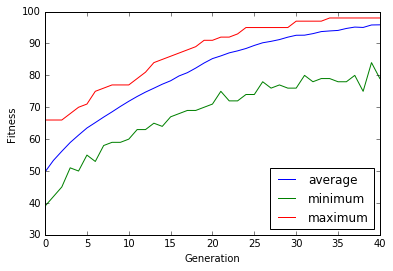

In [18]:
if __name__ == "__main__":
    pop, log, hof = ea_with_stats()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    
    %matplotlib inline
    import matplotlib.pyplot as plt
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")
    plt.show()

Μπορούμε επίσης αντί να χρησιμοποιήσουμε τους έτοιμους αλγόριθμους της algorithms να δημιουργήσουμε το δικό μας γενετικό αλγόριθμο που θα χρησιμοποιεί τους τελεστές που έχουμε ορίσει. Αυτό μας δίνει τη δυνατότητα να ελέγχουμε λεπτομερώς τη λειτουργία του αλγόριθμου.

In [19]:
def ea_manual():

    pop = toolbox.population(n=300)

    # όριζουμε τις πιθανότητες διασταύρωσης CXPB και μετάλλαξης MUTPB
    CXPB, MUTPB = 0.5, 0.2
    
    # υπολογίζουμε τη λίστα καταλληλότητας για όλο τον πληθυσμό
    fitnesses = list(map(toolbox.evaluate, pop))
    # στη manual εφαρμογή πρέπει εμείς να ενημερώνουμε τα fitness.values των ατόμων
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    
    # εξάγουμε το fitness ως scalar (το πρώτο χαρακτηριστικό της πλειάδας) σε μία λίστα
    fits = [ind.fitness.values[0] for ind in pop]

    # θα πρέπει επίσης να παρακολουθούμε εμείς τον αριθμό των γενεών
    g = 0
        
    # ξεκινάμε την εξέλιξη. Θα χρησιμοποιήσουμε δύο κριτήρια τερματισμού:
    while max(fits) < 100 and g < 100:
        # A new generation
        g = g + 1
                
        # Επιτελούμε φυσική επιλογή (επιστρέφονται αναφορές) τόσες φορές όσες ο πληθυσμός μας
        offspring = toolbox.select(pop, len(pop))
        # Χρησιμοποιώντας τις αναφορές δημιουργούμε μια νέα γενιά ατόμων (λίστα)
        offspring = list(map(toolbox.clone, offspring))
    
        # Εφαρμόζουμε τους τελεστές διασταύρωσης και μετάλλαξης
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
        # [::2] παίρνουμε κάθε δεύτερο στοιχειο (ζυγά)
        # [1::2] παίρνουμε το στοιχείο 1 και μετά κάθε δεύτερο στοιχείο (μονά)
            # διασταύρωση με πιθανότητα CXPB
            if random.random() < CXPB:
                toolbox.mate(child1, child2)

                # διαγράφουμε τις τιμές του fitness όσων έχουν υποστεί διασταύρωση
                # για να τις υπολογίσουμε αργότερα
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:

            # μετάλλαξη με πιθανότητα MUTPB
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                # διαγράφουμε τις τιμες του fitness όσων έχουν υποστεί μετάλλαξη
                del mutant.fitness.values
    
        # Θα επιλέξουμε ως invalid_ind τα άτομα που δεν έχουν τιμή fitness (που τη σβήσαμε πριν)
        # Με αυτό τον τρόπο υπολογίζουμε την καταλληλότητα μόνο στα καινούρια χρωμοσώματα
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        # αντικαθιστούμε τον πληθυσμό με τη νέα γενιά
        pop[:] = offspring
        
        # εξάγουμε το fitness κάθε ατόμου ως scalar (το πρώτο χαρακτηριστικό της πλειάδας) σε μία λίστα
        fits = [ind.fitness.values[0] for ind in pop]
        
        # υπολογίζουμε και τυπώνουμε τα στατιστικά κάθε γενιάς
        length = len(pop)
        mean = sum(fits) / length
        print "Gen %i" % g, "Evals %i" % len(invalid_ind), "  Avg %.4f" % mean, "  Min %s" % min(fits), "  Max %s" % max(fits)
    
    # επιλέγουμε και τυπώνουμε το καλύτερο άτομο του τελικού πληθυσμού
    best_ind = tools.selBest(pop, 1)[0]
    print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))

if __name__ == "__main__":
    ea_manual()

Gen 1 Evals 178   Avg 53.4500   Min 44.0   Max 64.0
Gen 2 Evals 162   Avg 56.5267   Min 42.0   Max 67.0
Gen 3 Evals 163   Avg 59.0433   Min 46.0   Max 68.0
Gen 4 Evals 169   Avg 61.6100   Min 51.0   Max 70.0
Gen 5 Evals 177   Avg 63.3433   Min 52.0   Max 71.0
Gen 6 Evals 195   Avg 64.7967   Min 52.0   Max 74.0
Gen 7 Evals 182   Avg 66.4867   Min 52.0   Max 75.0
Gen 8 Evals 172   Avg 68.2467   Min 55.0   Max 77.0
Gen 9 Evals 198   Avg 69.6900   Min 56.0   Max 79.0
Gen 10 Evals 196   Avg 71.6400   Min 60.0   Max 82.0
Gen 11 Evals 183   Avg 73.4800   Min 60.0   Max 80.0
Gen 12 Evals 164   Avg 74.7667   Min 63.0   Max 83.0
Gen 13 Evals 179   Avg 75.6033   Min 61.0   Max 84.0
Gen 14 Evals 182   Avg 77.2700   Min 65.0   Max 86.0
Gen 15 Evals 202   Avg 78.6367   Min 64.0   Max 86.0
Gen 16 Evals 179   Avg 79.9567   Min 66.0   Max 87.0
Gen 17 Evals 186   Avg 81.7633   Min 69.0   Max 87.0
Gen 18 Evals 181   Avg 82.7933   Min 68.0   Max 88.0
Gen 19 Evals 166   Avg 83.8933   Min 69.0   Max 89.0
Ge

# Παράδειγμα 2: Συναρτήσεις πολλών συνεχών μεταβλητών και περιορισμοί

Έστω ότι θέλουμε να ελαχιστοποιήσουμε τη συνάρτηση 5 μεταβλητών:

$$f(x_1,x_2,x_3,x_4,x_5) = -5sin(x_1)sin(x_2)sin(x_3)sin(x_4)sin(x_5) – sin(5x_1)sin(5x_2)sin(x_3)sin(5x_4)sin(5x_5)$$

με τον περιορισμό $x_i \in [0,\pi], \forall i$. 

"Γνωρίζουμε" ότι το ολικό ελάχιστο στο διάστημα αυτό είναι $-6$ και το επιτυγχάνουμε για $x_1=x_2=x_3=x_4=x_5=\pi/2$. 

Κατα τα γνωστά δημιουργούμε μια συνάρτηση καταλληλότητας προς ελαχιστοποίηση και τις κλάσεις των ατόμων και του πληθυσμού.

In [21]:
import numpy as np
from math import sin, pi

numVariables = 5 


creator.create( "FitnessMin", base.Fitness , weights=(-1.0,))
creator.create( "IndividualContainer", list , fitness= creator.FitnessMin)
toolbox2 = base.Toolbox()
toolbox2.register( "InitialValue", np.random.uniform, 0, pi)
toolbox2.register( "indiv", tools.initRepeat, creator.IndividualContainer, toolbox2.InitialValue, numVariables)
toolbox2.register( "population", tools.initRepeat, list , toolbox2.indiv)

def evalSinFunc( indiv ):
    sum= -5*sin( indiv [0])*sin( indiv [1])*sin( indiv [2])*sin( indiv [3])*sin( indiv [4]) - sin( indiv [0]*5)*sin( indiv [1]*5)*sin( indiv [2])*sin( indiv [3]*5)*sin( indiv [4]*5)
    return (sum,)

/gpfs/fs01/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'IndividualContainer' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [22]:
ind = toolbox2.indiv()
print ind

[2.596867383989538, 2.2603513090721203, 2.9344984720425336, 0.889789380194153, 2.367725471741764]


Ο βασικός τρόπος για να επιβάλουμε περιορισμούς είναι να επιβάλουμε μια ποινή στην τιμή της καταλληλότητας στα άτομα που είναι εκτός των ορίων που έχουμε θέσει. 

Αρχικά ορίζουμε δύο συναρτήσεις, τη "feasible" που μας επιστρέφει True αν όλα τα $x_i$ είναι εντός του διαστήματος και False αλλιώς και την "distance" που μας ποσοτικοποιεί πόσο εκτός ορίων είναι ένα άτομο. Συγκεκριμένα επιλέγουμε η απόσταση να είναι το απόλυτο άθροισμα σε όλες τις διαστάσεις της απόστασης από το όριο. Θα μπορούσαμε να κάνουμε και άλλες επιλογές όπως πχ να χρησιμοποιήσουμε μια τετραγωνική συνάρτηση της απόστασης.

In [4]:
MIN_BOUND = np.array([0]*numVariables)
MAX_BOUND = np.array([pi]*numVariables)

def feasible( indiv ):
    if any( indiv < MIN_BOUND) or any( indiv > MAX_BOUND):
        return False
    return True

def distance( indiv ) :
    dist = 0.0
    for i in range (len( indiv )) :
        penalty = 0
        if ( indiv [i] < MIN_BOUND[i]) : penalty = 0 - indiv [i]
        if ( indiv [i] > MAX_BOUND[i]) : penalty = indiv [i] - pi
        dist = dist + penalty
    return dist

'\nMIN_BOUND = np.array([0]*numVariables)\nMAX_BOUND = np.array([pi]*numVariables)\n\ndef feasible( indiv ):\n    if any( indiv < MIN_BOUND) or any( indiv > MAX_BOUND):\n        return False\n    return True\n\ndef distance( indiv ) :\n    dist = 0.0\n    for i in range (len( indiv )) :\n        penalty = 0\n        if ( indiv [i] < MIN_BOUND[i]) : penalty = 0 - indiv [i]\n        if ( indiv [i] > MAX_BOUND[i]) : penalty = indiv [i] - pi\n        dist = dist + penalty\n    return dist\n    '

Μια πολύ χρήσιμη μέθοδος που διαθέτει η Python και η DEAP είναι η διακόσμηση συναρτήσεων μέσω διακοσμητών (decorators). Πρόκειται για τη δυνατότητα να τροποποιούμε τη συμπεριφορά μιας συνάρτησης χωρίς να μεταβάλουμε τον κώδικά της αλλά επιτυγχάνοντάς το μέσω μιας άλλης συνάρτησης (του decorator). Για το DEAP για να διακοσμήσουμε μια συνάρτηση πρέπει να είναι εγγεγραμμένη στο toolbox. Εδώ θα τροποποιήσουμε τη συνάρτηση καταλληλότητας `evalSinFunv` με την builtin `DeltaPenality`:

In [24]:
toolbox2.register( "evaluate", evalSinFunc)
toolbox2.decorate( "evaluate", tools.DeltaPenality (feasible, 7.0, distance))

Η DeltaPenality ή ποινή-Δ απαιτεί τουλάχιστον δύο ορίσματα. Το πρώτο πρέπει να επιστρέφει αν ένα άτομο είναι έγκυρο ή όχι, σύμφωνα με τα όρια που έχουμε θέσει. Εμείς θα χρησιμοποιήσουμε τη "feasible" που ορίσαμε γι' αυτό το λόγο. Το δεύτερο όρισμα είναι η σταθερά Δ, δηλαδή η σταθερή ποινή που θα προστεθεί (σε πρόβλημα ελαχιστοποίησης) ή αφαιρεθεί (σε πρόβλημα μεγιστοποίησης) στην τιμή καταλληλότητας ενός ατόμου που είναι εκτός των ορίων που θέλουμε. Ο τρίτος όρος είναι μια επιπλέον ποινή που μπορεί να εφαρμοστεί και που συνήθως την ορίζουμε να είναι ανάλογη του κατά πόσο είναι εκτός ορίων ένα άτομο.Συνολικά δηλαδή θα έχουμε: 
$$f_i^\mathrm{penalty}(\mathbf{x}) = \Delta - w_i d_i(\mathbf{x})$$
Θυμηθείτε ότι στο μονο-κριτηριακό ($i=1$) πρόβλημα ελαχιστοποίησης μας έχουμε θέσει $w_1=-1.0$ (μπορούμε να αντιληφθούμε ήδη πως μέσω της συνάρτησης ποινής Δ θα μπορούμε να λαμβάνουμε υπόψη διαφορετικά βάρη στα κριτήρια μιας πολυ-κριτηριακής βελτιστοποίησης). Εδώ θα χρησιμοποιήσουμε την "distance" που ορίσαμε προηγουμένως. Μπορείτε να δείτε περισσότερα παραδείγματα υλποίησης περιορισμών [εδώ](http://deap.readthedocs.io/en/master/tutorials/advanced/constraints.html). 

Εφόσον έχουμε πραγματικούς αριθμούς θα χρησιμοποιήσουμε ένα διαφορετικό τελεστή μετάλλαξης, τον `cxBlend` που ανακατεύει το γενετικό υλικό των γονέων $x_1$ και $x_2$ σε κάθε διάσταση $i$ με τυχαίο τρόπο και ανάλογο της παραμέτρου $\alpha$: 

$\gamma = (1 + 2 \cdot \alpha) \cdot  random() - \alpha\\
ind1[i] = (1 - gamma) \cdot x_1[i] + gamma \cdot x_2[i]\\
ind2[i] = gamma \cdot x_1[i] + (1 - gamma) \cdot x_2[i]$

In [25]:
def my_mutation(ind1 , ind2 ):
    alpha = 0.5
    (ind1, ind2) = tools.cxBlend(ind1, ind2, alpha)
    return ind1 , ind2

In [26]:
toolbox2.register( "mate", my_mutation)
# επιλέγουμε κέντρο της γκαουσιανής τη μέση του διαστήματος
toolbox2.register( "mutate", tools.mutGaussian, mu = 0.5 * pi/2, sigma=1.0, indpb=0.05)
toolbox2.register( "select", tools.selTournament, tournsize=3)

In [27]:
def ea2_with_stats():
    import numpy
      
    pop = toolbox2.population(n=200)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaSimple(pop, toolbox2, cxpb=0.5, mutpb=0.2, ngen=30, stats=stats, halloffame=hof, verbose=True)
    
    return pop, logbook, hof

In [28]:
if __name__ == "__main__":
    pop, log, hof = ea2_with_stats()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))

gen	nevals	avg      	min     	max     
0  	200   	-0.589791	-3.32645	0.542732
1  	118   	-0.387315	-3.89555	7.78509 
2  	123   	-1.5511  	-4.6853 	8.33188 
3  	128   	-2.59138 	-5.2981 	8.26988 
4  	118   	-3.395   	-5.32623	7.88378 
5  	112   	-3.78332 	-5.32623	-0.151913
6  	111   	-4.22813 	-5.85182	7.43068  
7  	110   	-4.36958 	-5.88131	7.93927  
8  	125   	-4.83632 	-5.88131	7.38798  
9  	112   	-5.12587 	-5.98361	8.0354   
10 	122   	-5.39793 	-5.97785	7.36876  
11 	133   	-5.41773 	-5.97848	7.72856  
12 	116   	-5.6735  	-5.98679	7.7095   
13 	118   	-5.80796 	-5.99372	7.66304  
14 	110   	-5.6079  	-5.99372	7.62396  
15 	101   	-5.83084 	-5.9962 	7.34484  
16 	121   	-5.53158 	-5.99872	8.87703  
17 	104   	-5.74268 	-5.99896	7.39692  
18 	108   	-5.90535 	-5.99977	8.33554  
19 	115   	-5.91179 	-5.99977	-2.91184 
20 	108   	-5.8123  	-5.99987	7.38663  
21 	115   	-5.79475 	-5.99987	7.7672   
22 	120   	-5.64916 	-5.99991	7.56654  
23 	129   	-5.81297 	-5.99997	7.71231  
24 	11